In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

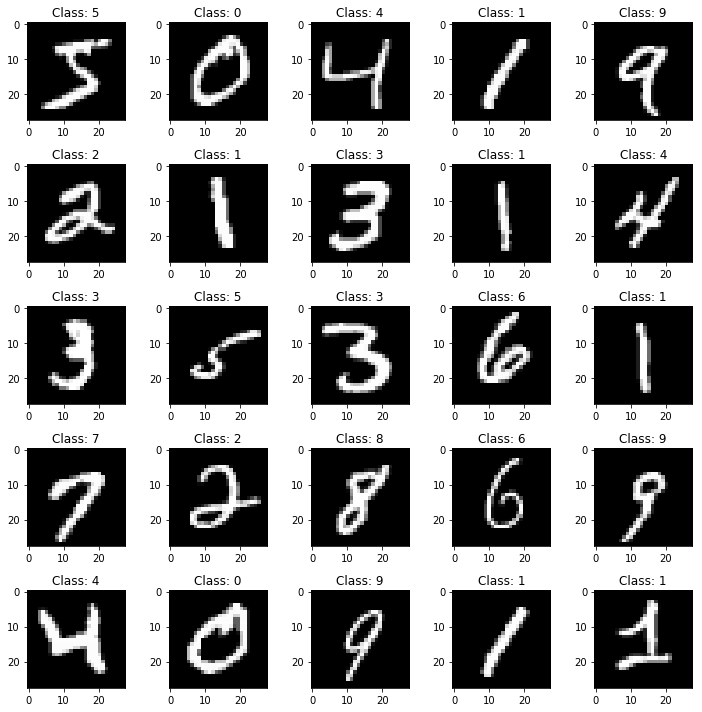

In [3]:
plt.figure(figsize=(10,10))
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title('Class: {}'.format(y_train[idx]))
    
plt.tight_layout()

In [4]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
(X_train.min(), X_train.max()), (X_test.min(), X_test.max())

((0, 255), (0, 255))

In [6]:
if np.max(X_train) > 1: X_train = X_train / 255
if np.max(X_test) > 1: X_test = X_test / 255

In [7]:
(X_train.min(), X_train.max()), (X_test.min(), X_test.max())

((0.0, 1.0), (0.0, 1.0))

In [8]:
if len(y_train.shape) == 1:
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

In [9]:
 model = Sequential([
     Conv2D(filters=32, kernel_size=(3, 3), input_shape=input_shape),
     MaxPool2D(pool_size=(2, 2)),
     
     Conv2D(filters=64, kernel_size=(3, 3)),
     MaxPool2D(pool_size=(2, 2)),
     
     Flatten(),
     Dense(512, activation='relu'),
     Dense(num_classes, activation='softmax')
     
 ])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


## Trenowania

In [10]:
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=3,
    validation_data=(X_test, y_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 57s 942us/step - loss: 0.1680 - acc: 0.9512 - val_loss: 0.0458 - val_acc: 0.9859
Epoch 2/3
60000/60000 [==============================] - 58s 963us/step - loss: 0.0464 - acc: 0.9859 - val_loss: 0.0349 - val_acc: 0.9885
Epoch 3/3
60000/60000 [==============================] - 53s 887us/step - loss: 0.0292 - acc: 0.9910 - val_loss: 0.0343 - val_acc: 0.9879


## Testowanie

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)

In [13]:
score

[0.03434978096575942, 0.9879]